In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import classification as lg
import digit_class as digits
#import digits_function as digitsfunc
from datetime import datetime
import time
from sklearn import svm, ensemble

In [3]:
###### Load Data #################

train_x, train_y = digits.load_digits("/Users/xinw/Documents/projects/velox-centipede/data", digits_filename = "mnist_train.csv")
Z = digits.normalize_digits(train_x)
test_x, test_y = digits.load_digits("/Users/xinw/Documents/projects/velox-centipede/data", digits_filename = "mnist_test.csv")
test_Z = digits.normalize_digits(test_x)
#Z = digits.fourier_project(train_x)


Source file: /Users/xinw/Documents/projects/velox-centipede/data/mnist_train.csv
Number of image files: 60000
Source file: /Users/xinw/Documents/projects/velox-centipede/data/mnist_test.csv
Number of image files: 10000


In [3]:
### Partial Concept Drift 

####### Initialization ##########
tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2


In [ ]:
ntask = 20
## Strategy: Train All data
oracle_train_all_errors = []
oracle_train_all = lg.LgSegmentModel(xs,ys,ss,'train-all',k) 
svm_train_all = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_train_all, svm_train_all,3)
"""
for j in range(train_iter):
    oracle_train_all.train_all_fs()
    oracle_train_all.train_ws()
oracle_err = lg.seg_model_error_01(oracle_train_all, test_xs, test_ys, test_ss, num=20)
oracle_train_all_errors.append(oracle_err)
#oracle_mtl_errors.append(oracle_err)
print "Initial Error OracleMTL---Train All: %f" % oracle_err
"""
svm_train_all.train_all_fs()
svm_train_all.train_ws()
svm_err = lg.seg_model_error_01(svm_train_all,test_xs,test_ys,test_ss)
print 'Initial Error SVM_mtl---Train All: ', svm_err
svm_train_all_errors = []


## strategy: retrain-new
oracle_retrain_new_errors = []
oracle_retrain_new = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_retrain_new = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_retrain_new, svm_retrain_new,3)
"""
for j in range(train_iter):
    oracle_retrain_new.train_all_fs()
    oracle_retrain_new.train_ws()
oracle_retrain_new.strategy = 'retrain-new'    
"""
svm_retrain_new.train_all_fs()
svm_retrain_new.train_ws()
svm_retrain_new_errors = []
svm_retrain_new.strategy = 'retrain-new'
"""
oracle_err = lg.seg_model_error_01(oracle_retrain_new, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_retrain_new,test_xs,test_ys,test_ss)
#svm_retrain_new_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err



## strategy: average-weight
oracle_average_weight_errors = []
oracle_average_weight = lg.LgSegmentModel(xs,ys,ss,'train-all',k) 
svm_average_weight = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_average_weight, svm_average_weight,3)
"""
for j in range(train_iter):
    oracle_average_weight.train_all_fs()
    oracle_average_weight.train_ws()
oracle_average_weight.strategy = 'average-weight'    
"""
svm_average_weight.train_all_fs()
svm_average_weight.train_ws()
svm_average_weight_errors = []
svm_average_weight.strategy = 'average-weight'
"""
oracle_err = lg.seg_model_error_01(oracle_average_weight, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_average_weight,test_xs,test_ys,test_ss)
#svm_average_weight_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err

## strategy: last-point
oracle_last_point_errors = []
oracle_last_point = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_last_point = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_last_point, svm_last_point,3)
print len(test_ss)
"""
for j in range(train_iter):
    oracle_last_point.train_all_fs()
    oracle_last_point.train_ws()
oracle_last_point.strategy = 'last-point'    
"""
svm_last_point.train_all_fs()
svm_last_point.train_ws()
svm_last_point_errors = []
svm_last_point.strategy = 'last-point'

"""
oracle_err = lg.seg_model_error_01(oracle_last_point, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_last_point,test_xs,test_ys,test_ss)
#svm_last_point_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err


## strategy: Gradient-step
oracle_gradient_step_errors = []
oracle_gradient_step = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_gradient_step = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_gradient_step, svm_gradient_step,3)
"""
for j in range(train_iter):
    oracle_gradient_step.train_all_fs()
    oracle_gradient_step.train_ws()
oracle_gradient_step.strategy = 'Gradient-step'    
"""

svm_gradient_step.train_all_fs()
svm_gradient_step.train_ws()
svm_gradient_step_errors = []
svm_gradient_step.strategy = 'Gradient-step'

"""
oracle_err = lg.seg_model_error_01(oracle_gradient_step, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_gradient_step,test_xs,test_ys,test_ss)
#svm_gradient_step_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err

print '\n\n Finish Initialization!'


TOTALS: fit time: 12.055393
start training ws!
ws: feature_time (s): 0.044092, train_time (s): 0.024299
Initial Error SVM_mtl---Train All:  0.1135
TOTALS: fit time: 22.912378
start training ws!
ws: feature_time (s): 0.102453, train_time (s): 0.041574

In [6]:
print len(test_xs)

4000


In [7]:
test_xa = list(test_xs)
test_ya = list(test_ys)
test_ta = list(test_ss)

In [53]:
test_xs1,test_ys1,test_ts1 = digits.generate_data_concept_drift(Z, train_y, oracle_train_all,svm_train_all,i,'partial')
test_xs2,test_ys2,test_ts2 = digits.generate_data_concept_drift(Z, train_y, oracle_retrain_new,svm_retrain_new,i,'partial')
test_xs3,test_ys3,test_ts3 = digits.generate_data_concept_drift(Z, train_y, oracle_average_weight,svm_average_weight,i,'partial')
test_xs4,test_ys4,test_ts4 = digits.generate_data_concept_drift(Z, train_y, oracle_last_point,svm_last_point,i,'partial')
test_xs5,test_ys5,test_ts5 = digits.generate_data_concept_drift(Z, train_y, oracle_gradient_step,svm_gradient_step,i,'partial')


digit_class.py:447: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  perm = np.random.permutation(len(y)) # shuffle dataset


In [56]:
len(svm_train_all.segments[0].ys)

40

In [57]:

####### Update Strategy Experiment #################
# number of points range from 20-200, step = 10


iters = [i+20 for i in range(20)]
for i in iters:
    print 'update-strategy: # of points: ', i
    ## oracle
    """
    oracle_train_all.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_train_all, test_xs, test_ys, test_ts, num=20)
    oracle_train_all_errors.append(oracle_err)
    print 'Testing Error of oracle model-- train-all is ', oracle_err

    oracle_retrain_new.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_retrain_new, test_xs, test_ys, test_ts, num=20)
    oracle_retrain_new_errors.append(oracle_err)
    print 'Testing Error of oracle model-- retrain_new is ', oracle_err

    oracle_average_weight.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_average_weight, test_xs, test_ys, test_ts, num=20)
    oracle_average_weight_errors.append(oracle_err)
    print 'Testing Error of oracle model-- average_weight is ', oracle_err
    
    oracle_last_point.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_last_point, test_xs, test_ys, test_ts, num=20)
    oracle_last_point_errors.append(oracle_err)
    print 'Testing Error of oracle model-- last_point is ', oracle_err
    
    oracle_gradient_step.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_gradient_step, test_xs, test_ys, test_ts, num=20)
    oracle_gradient_step_errors.append(oracle_err)
    print 'Testing Error of oracle model-- gradient_step is ', oracle_err    
    """
    ### svm
    
    svm_train_all.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_train_all, test_xs1, test_ys1, test_ts1)
    svm_train_all_errors.append(svm_err)
    print 'Testing Error of svm model-- train-all is ', svm_err
    
    
    svm_retrain_new.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_retrain_new, test_xs2, test_ys2, test_ts2)
    svm_retrain_new_errors.append(svm_err)
    print 'Testing Error of svm model-- retrain_new is ', svm_err
    
    
    svm_average_weight.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_average_weight, test_xs3, test_ys3, test_ts3)
    svm_average_weight_errors.append(svm_err)
    print 'Testing Error of svm model-- average_weight is ', svm_err
    
    svm_last_point.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_last_point, test_xs4, test_ys4, test_ts4)
    svm_last_point_errors.append(svm_err)
    print 'Testing Error of svm model-- last_point is ', svm_err
    
    
    svm_gradient_step.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_gradient_step, test_xs5, test_ys5, test_ts5)
    svm_gradient_step_errors.append(svm_err)
    print 'Testing Error of svm model-- gradient_step is ', svm_err  

 

update-strategy: # of points:  20
start training ws!
ws: feature_time (s): 0.119688, train_time (s): 0.053971
Testing Error of svm model-- train-all is  0.22125
start training ws!
ws: feature_time (s): 0.146294, train_time (s): 0.043099
Testing Error of svm model-- retrain_new is  0.52375
start training ws!
ws: feature_time (s): 0.197951, train_time (s): 0.048806
Testing Error of svm model-- average_weight is  0.4965
start training ws!
ws: feature_time (s): 0.198691, train_time (s): 0.003562
Testing Error of svm model-- last_point is  0.48725
start training ws!
ws: feature_time (s): 0.234908, train_time (s): 0.005531
Testing Error of svm model-- gradient_step is  0.49825
update-strategy: # of points:  21
start training ws!
ws: feature_time (s): 0.146569, train_time (s): 0.057529
Testing Error of svm model-- train-all is  0.22125
start training ws!
ws: feature_time (s): 0.173383, train_time (s): 0.046046
Testing Error of svm model-- retrain_new is  0.52375
start training ws!
ws: feature

In [58]:
iters = [20]+iters

In [14]:
print iters

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [22]:
print len(iters)
del svm_retrain_new_errors[1]
del svm_retrain_new_errors[2]
del svm_retrain_new_errors[3]
print len(svm_retrain_new_errors)

31
31


In [375]:

## Write Files ###

f = open('update-strategy-experiment-partial-concept-drift.txt','w')
#f = open('update-strategy-experiment-total-concept-drift.txt','w')
#f = open('update-strategy-experiment-stationery-distribution.txt','w')
f.write('strategy: train-all\n')
"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_train_all_errors:
    f.write('\t'+str(t))
"""    
f.write('SVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_train_all_errors:
    f.write('\t'+str(t))
f.write('\n\n')

f.write('strategy: retrain_new\n')
"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_retrain_new_errors:
    f.write('\t'+str(t))
"""
    
f.write('SVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_retrain_new_errors:
    f.write('\t'+str(t))
f.write('\n\n')


f.write('strategy: average_weight\n')

"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_average_weight_errors:
    f.write('\t'+str(t))
"""    
    
f.write('\n\nSVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_average_weight_errors:
    f.write('\t'+str(t))
f.write('\n\n')

f.write('strategy: last_point\n')
"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_last_point_errors:
    f.write('\t'+str(t))
"""    
    
f.write('\n\nSVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_last_point_errors:
    f.write('\t'+str(t))
f.write('\n\n')

f.write('strategy: gradient_step\n')
"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_gradient_step_errors:
    f.write('\t'+str(t))
"""    
    
f.write('\n\nSVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_gradient_step_errors:
    f.write('\t'+str(t))
f.write('\n')

f.close()

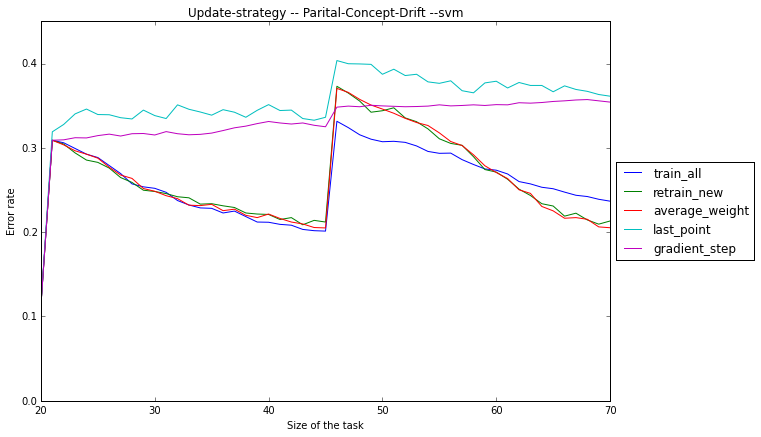

In [374]:
## plot ###
"""
fig,ax = plt.subplots()
#ax.plot(iters, oracle_train_all_errors, label='train_all')
ax.plot(iters, oracle_retrain_new_errors, label = 'retrain_new')
#ax.plot(iters, oracle_average_weight_errors, label = 'average_weight')
#ax.plot(iters, oracle_last_point_errors, label = 'last_point')
#ax.plot(iters, oracle_gradient_step_errors, label = 'gradient_step')
ax.set_xlabel('Size of the task')
ax.set_ylabel('Error rate')
ax.set_title('Update-strategy -- Partial-Concept-Drift --Oracle ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
default_size = fig.get_size_inches()
size_mult = 1.7
ax.set_ylim((0.0, ax.get_ylim()[1]))
fig.set_size_inches(default_size[0]*size_mult,default_size[1]*size_mult)
plt.show()
"""
fig,ax = plt.subplots()
ax.plot(iters, svm_train_all_errors, label='train_all')
ax.plot(iters, svm_retrain_new_errors, label = 'retrain_new')
ax.plot(iters, svm_average_weight_errors, label = 'average_weight')
ax.plot(iters, svm_last_point_errors, label = 'last_point')
ax.plot(iters, svm_gradient_step_errors, label = 'gradient_step')
ax.set_xlabel('Size of the task')
ax.set_ylabel('Error rate')
#ax.set_title('Update-strategy -- Stationery-Distribution --svm ')
#ax.set_title('Update-strategy -- Total-Concept-Drift --svm ')
ax.set_title('Update-strategy -- Parital-Concept-Drift --svm ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
default_size = fig.get_size_inches()
size_mult = 1.7
ax.set_ylim((0.0, ax.get_ylim()[1]))
fig.set_size_inches(default_size[0]*size_mult,default_size[1]*size_mult)
plt.show()


In [347]:
### Partial Concept Drift 

####### Initialization ##########
tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [317]:
tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)

# retrain New

In [348]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [349]:
oracle_retrain_new_errors = []
oracle_retrain_new = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_retrain_new = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_retrain_new, svm_retrain_new,3)
"""
for j in range(train_iter):
    oracle_retrain_new.train_all_fs()
    oracle_retrain_new.train_ws()
oracle_retrain_new.strategy = 'retrain-new'    
"""
svm_retrain_new.train_all_fs()
svm_retrain_new.train_ws()
svm_retrain_new_errors = []
svm_retrain_new.strategy = 'retrain-new'
"""
oracle_err = lg.seg_model_error_01(oracle_retrain_new, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_retrain_new,test_xs,test_ys,test_ss)
svm_retrain_new_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err


TOTALS: fit time: 9.286524
start training ws!
ws: feature_time (s): 0.041514, train_time (s): 0.023275
Initial Error SVM_mtl---Train All:  0.1135


In [350]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_retrain_new,svm_retrain_new,'partial')

In [351]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_retrain_new,svm_retrain_new,'partial')

In [288]:
len(test_xss1)

4000

In [289]:
segment= svm_retrain_new.segments

In [322]:
len(segment[0].xs)

70

In [352]:
for i in range(50):
    i+=20
    print 'points is i', i
    svm_retrain_new.train_ws(i)
    if i<45:
        svm_err = lg.seg_model_error_01(svm_retrain_new,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_retrain_new,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_retrain_new_errors.append(svm_err)

points is i 20
start training ws!
ws: feature_time (s): 0.202794, train_time (s): 0.043634
0.309
points is i 21
start training ws!
ws: feature_time (s): 0.160678, train_time (s): 0.036403
0.3045
points is i 22
start training ws!
ws: feature_time (s): 0.156346, train_time (s): 0.036992
0.294
points is i 23
start training ws!
ws: feature_time (s): 0.157491, train_time (s): 0.035676
0.2855
points is i 24
start training ws!
ws: feature_time (s): 0.166958, train_time (s): 0.037271
0.28275
points is i 25
start training ws!
ws: feature_time (s): 0.248160, train_time (s): 0.054385
0.276
points is i 26
start training ws!
ws: feature_time (s): 0.231093, train_time (s): 0.051231
0.26475
points is i 27
start training ws!
ws: feature_time (s): 0.162991, train_time (s): 0.043913
0.259
points is i 28
start training ws!
ws: feature_time (s): 0.162875, train_time (s): 0.040561
0.24975
points is i 29
start training ws!
ws: feature_time (s): 0.199755, train_time (s): 0.049715
0.24825
points is i 30
start

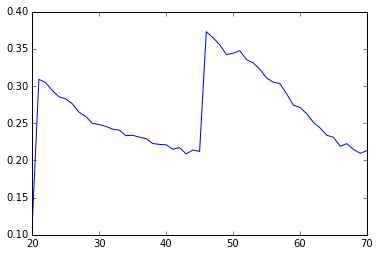

In [353]:
plt.plot(iters,svm_retrain_new_errors)
plt.show()

# Train All

In [354]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [355]:
oracle_train_all_errors = []
oracle_train_all = lg.LgSegmentModel(xs,ys,ss,'train-all',k) 
svm_train_all = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_train_all, svm_train_all,3)
"""
for j in range(train_iter):
    oracle_train_all.train_all_fs()
    oracle_train_all.train_ws()
oracle_err = lg.seg_model_error_01(oracle_train_all, test_xs, test_ys, test_ss, num=20)
oracle_train_all_errors.append(oracle_err)
#oracle_mtl_errors.append(oracle_err)
print "Initial Error OracleMTL---Train All: %f" % oracle_err
"""
svm_train_all.train_all_fs()
svm_train_all.train_ws()
svm_err = lg.seg_model_error_01(svm_train_all,test_xs,test_ys,test_ss)
print 'Initial Error SVM_mtl---Train All: ', svm_err
svm_train_all_errors = [svm_err]

TOTALS: fit time: 8.103064
start training ws!
ws: feature_time (s): 0.042119, train_time (s): 0.024022
Initial Error SVM_mtl---Train All:  0.1135


In [252]:
len(svm_train_all.xs)

2000

In [356]:
svm_train_all.xs += svm_retrain_new.xs[2000:]
svm_train_all.ys += svm_retrain_new.ys[2000:]
svm_train_all.ss += svm_retrain_new.ss[2000:]
svm_train_all.digitys += svm_retrain_new.digitys[2000:]
segment = svm_train_all.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [254]:
len(svm_train_all.segments[0].xs)

70

In [105]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_train_all,svm_train_all,'partial')

In [106]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_train_all,svm_train_all,'partial')

In [357]:
for i in range(50):
    i+=20
    print 'points is i', i
    svm_train_all.train_ws(i)
    if i<45:
        svm_err = lg.seg_model_error_01(svm_train_all,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_train_all,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_train_all_errors.append(svm_err)

points is i 20
start training ws!
ws: feature_time (s): 0.175950, train_time (s): 0.041828
0.309
points is i 21
start training ws!
ws: feature_time (s): 0.165284, train_time (s): 0.041000
0.306
points is i 22
start training ws!
ws: feature_time (s): 0.160343, train_time (s): 0.037270
0.29925
points is i 23
start training ws!
ws: feature_time (s): 0.159816, train_time (s): 0.039015
0.2925
points is i 24
start training ws!
ws: feature_time (s): 0.167016, train_time (s): 0.042687
0.2885
points is i 25
start training ws!
ws: feature_time (s): 0.161066, train_time (s): 0.039096
0.279
points is i 26
start training ws!
ws: feature_time (s): 0.219676, train_time (s): 0.052206
0.2695
points is i 27
start training ws!
ws: feature_time (s): 0.204190, train_time (s): 0.047550
0.25725
points is i 28
start training ws!
ws: feature_time (s): 0.225835, train_time (s): 0.055873
0.25375
points is i 29
start training ws!
ws: feature_time (s): 0.253704, train_time (s): 0.069090
0.252
points is i 30
start 

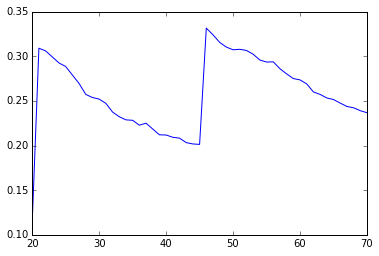

In [358]:
plt.plot(iters,svm_train_all_errors)
plt.show()

# Average Weight

In [359]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [360]:
## strategy: average-weight
oracle_average_weight_errors = []
oracle_average_weight = lg.LgSegmentModel(xs,ys,ss,'train-all',k) 
svm_average_weight = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_average_weight, svm_average_weight,3)
"""
for j in range(train_iter):
    oracle_average_weight.train_all_fs()
    oracle_average_weight.train_ws()
oracle_average_weight.strategy = 'average-weight'    
"""
svm_average_weight.train_all_fs()
svm_average_weight.train_ws()
svm_average_weight_errors = []
svm_average_weight.strategy = 'average-weight'
"""
oracle_err = lg.seg_model_error_01(oracle_average_weight, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_average_weight,test_xs,test_ys,test_ss)
svm_average_weight_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err


TOTALS: fit time: 9.609046
start training ws!
ws: feature_time (s): 0.044574, train_time (s): 0.025140
Initial Error SVM_mtl---Train All:  0.1135


In [361]:
svm_average_weight.xs += svm_retrain_new.xs[2000:]
svm_average_weight.ys += svm_retrain_new.ys[2000:]
svm_average_weight.ss += svm_retrain_new.ss[2000:]
svm_average_weight.digitys += svm_retrain_new.digitys[2000:]
segment = svm_average_weight.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [234]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_average_weight,svm_average_weight,'partial')

In [235]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_average_weight,svm_average_weight,'partial')

In [362]:
for i in range(50):
    i+=20
    print 'points is i', i
    svm_average_weight.train_ws(i)
    if i<45:
        svm_err = lg.seg_model_error_01(svm_average_weight,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_average_weight,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_average_weight_errors.append(svm_err)

points is i 20
start training ws!
ws: feature_time (s): 0.178535, train_time (s): 0.043241
0.309
points is i 21
start training ws!
ws: feature_time (s): 0.171642, train_time (s): 0.039051
0.3035
points is i 22
start training ws!
ws: feature_time (s): 0.164833, train_time (s): 0.039652
0.2965
points is i 23
start training ws!
ws: feature_time (s): 0.156207, train_time (s): 0.038973
0.2925
points is i 24
start training ws!
ws: feature_time (s): 0.156181, train_time (s): 0.037270
0.28775
points is i 25
start training ws!
ws: feature_time (s): 0.157164, train_time (s): 0.039158
0.277
points is i 26
start training ws!
ws: feature_time (s): 0.216719, train_time (s): 0.048146
0.26775
points is i 27
start training ws!
ws: feature_time (s): 0.159408, train_time (s): 0.040173
0.26375
points is i 28
start training ws!
ws: feature_time (s): 0.232350, train_time (s): 0.055821
0.25175
points is i 29
start training ws!
ws: feature_time (s): 0.187921, train_time (s): 0.043874
0.2485
points is i 30
sta

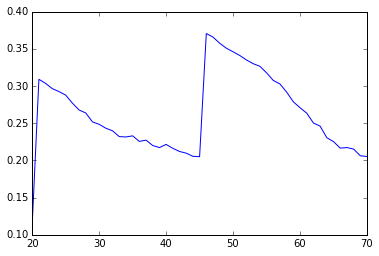

In [363]:
plt.plot(iters,svm_average_weight_errors)
plt.show()

In [230]:
svm_average_weight.train_ws(30)

start training ws!
ws: feature_time (s): 0.218509, train_time (s): 0.053800


# Last Point

In [364]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [365]:
## strategy: last-point
oracle_last_point_errors = []
oracle_last_point = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_last_point = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_last_point, svm_last_point,3)
print len(test_ss)
"""
for j in range(train_iter):
    oracle_last_point.train_all_fs()
    oracle_last_point.train_ws()
oracle_last_point.strategy = 'last-point'    
"""
svm_last_point.train_all_fs()
svm_last_point.train_ws()
svm_last_point_errors = []
svm_last_point.strategy = 'last-point'

"""
oracle_err = lg.seg_model_error_01(oracle_last_point, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_last_point,test_xs,test_ys,test_ss)
svm_last_point_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err

4000
TOTALS: fit time: 8.617532
start training ws!
ws: feature_time (s): 0.046348, train_time (s): 0.026680
Initial Error SVM_mtl---Train All:  0.1135


In [366]:
svm_last_point.xs += svm_retrain_new.xs[2000:]
svm_last_point.ys += svm_retrain_new.ys[2000:]
svm_last_point.ss += svm_retrain_new.ss[2000:]
svm_last_point.digitys += svm_retrain_new.digitys[2000:]
segment = svm_last_point.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [211]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_last_point,svm_last_point,'partial')

In [212]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_last_point,svm_last_point,'partial')

In [367]:
for i in range(50):
    i+=20
    print 'points is i', i
    svm_last_point.train_ws(i)
    if i<45:
        svm_err = lg.seg_model_error_01(svm_last_point,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_last_point,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_last_point_errors.append(svm_err)

points is i 20
start training ws!
ws: feature_time (s): 0.161372, train_time (s): 0.003980
0.319
points is i 21
start training ws!
ws: feature_time (s): 0.168309, train_time (s): 0.004056
0.32775
points is i 22
start training ws!
ws: feature_time (s): 0.162996, train_time (s): 0.003993
0.34025
points is i 23
start training ws!
ws: feature_time (s): 0.159494, train_time (s): 0.003855
0.346
points is i 24
start training ws!
ws: feature_time (s): 0.154283, train_time (s): 0.003853
0.3395
points is i 25
start training ws!
ws: feature_time (s): 0.196035, train_time (s): 0.004924
0.33925
points is i 26
start training ws!
ws: feature_time (s): 0.209396, train_time (s): 0.006294
0.33575
points is i 27
start training ws!
ws: feature_time (s): 0.227530, train_time (s): 0.008000
0.33425
points is i 28
start training ws!
ws: feature_time (s): 0.211042, train_time (s): 0.006036
0.34475
points is i 29
start training ws!
ws: feature_time (s): 0.168542, train_time (s): 0.004399
0.33825
points is i 30


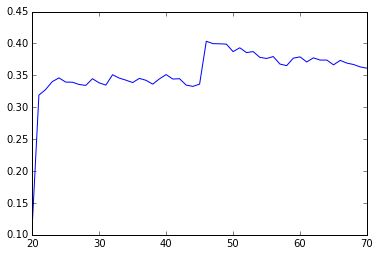

In [368]:
plt.plot(iters,svm_last_point_errors)
plt.show()

In [207]:
test_y = test_yss + test_yss1
test_x = test_xss + test_xss1
test_t = test_tss + test_tss1
svm_err = lg.seg_model_error_01(svm_last_point,test_xss,test_yss,test_tss)
print svm_err

0.30525


In [214]:
svm_last_point.segments[0].ws

array([ -73.26229593,  -38.74546957, -159.86351126,  -78.36026822,
        -31.00441489, -152.5344289 , -119.29978424,  -71.61610208,
        -58.61061959,  -21.36368386])

In [208]:
svm_last_point.segments[0].ws

array([ 13224.15503567,   8740.38368727,  -2459.64908903,  33445.90224465,
        15663.45542369,  15577.57763764,  19718.17634   ,   5538.95911512,
         2685.1676557 ,   6869.42426949])

# Gradient Step

In [369]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [370]:
## strategy: Gradient-step
oracle_gradient_step_errors = []
oracle_gradient_step = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_gradient_step = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_gradient_step, svm_gradient_step,3)
"""
for j in range(train_iter):
    oracle_gradient_step.train_all_fs()
    oracle_gradient_step.train_ws()
oracle_gradient_step.strategy = 'Gradient-step'    
"""

svm_gradient_step.train_all_fs()
svm_gradient_step.train_ws()
svm_gradient_step_errors = []
svm_gradient_step.strategy = 'Gradient-step'

"""
oracle_err = lg.seg_model_error_01(oracle_gradient_step, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_gradient_step,test_xs,test_ys,test_ss)
svm_gradient_step_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err


TOTALS: fit time: 9.233587
start training ws!
ws: feature_time (s): 0.045235, train_time (s): 0.026869
Initial Error SVM_mtl---Train All:  0.1135


In [371]:
svm_gradient_step.xs += svm_retrain_new.xs[2000:]
svm_gradient_step.ys += svm_retrain_new.ys[2000:]
svm_gradient_step.ss += svm_retrain_new.ss[2000:]
svm_gradient_step.digitys += svm_retrain_new.digitys[2000:]
segment = svm_gradient_step.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [88]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_gradient_step,svm_gradient_step,'partial')

In [158]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_gradient_step,svm_gradient_step,'partial')

In [372]:
for i in range(50):
    i+=20
    print 'points is i', i
    #print svm_gradient_step.segments[0].ws
    svm_gradient_step.train_ws(i)
    if i <45:
        svm_err = lg.seg_model_error_01(svm_gradient_step,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_gradient_step,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_gradient_step_errors.append(svm_err)

points is i 20
start training ws!
ws: feature_time (s): 0.169671, train_time (s): 0.006582
0.309
points is i 21
start training ws!
ws: feature_time (s): 0.165236, train_time (s): 0.005821
0.3095
points is i 22
start training ws!
ws: feature_time (s): 0.158614, train_time (s): 0.005853
0.312
points is i 23
start training ws!
ws: feature_time (s): 0.157111, train_time (s): 0.005730
0.31175
points is i 24
start training ws!
ws: feature_time (s): 0.171564, train_time (s): 0.006435
0.3145
points is i 25
start training ws!
ws: feature_time (s): 0.183503, train_time (s): 0.006540
0.31625
points is i 26
start training ws!
ws: feature_time (s): 0.185980, train_time (s): 0.007100
0.314
points is i 27
start training ws!
ws: feature_time (s): 0.214680, train_time (s): 0.007887
0.31675
points is i 28
start training ws!
ws: feature_time (s): 0.214285, train_time (s): 0.009840
0.317
points is i 29
start training ws!
ws: feature_time (s): 0.206430, train_time (s): 0.007589
0.31525
points is i 30
start

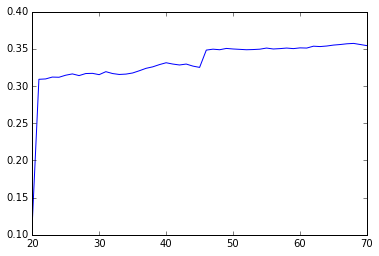

In [373]:
plt.plot(iters,svm_gradient_step_errors)
plt.show()